In [1]:
using Plots, LaTeXStrings

## Runge-Kutta de orden 4

In [2]:
## MÉTODO DE RUNGE-KUTTA 4

function rk4(f,x_0,t_0,t_f,h)
    tiempos = range(t_0,stop=t_f,step=h)
    dim=length(x_0) ## dimensión del sistema de edo's
    n=length(tiempos) ## número de pasos que se harán
    
    xs=zeros(n,dim)
    xs[1,:] = x_0
    
    k=zeros(4,dim) ## arreglo donde se guardarán los vectores k_i
    
    for i in 2:n
        k[1,:]=f(xs[i-1,:],tiempos[i-1])
        k[2,:]=f(xs[i-1,:]+(h/2)*k[1,:],tiempos[i-1]+h/2)
        k[3,:]=f(xs[i-1,:]+(h/2)*k[2,:],tiempos[i-1]+h/2)
        k[4,:]=f(xs[i-1,:]+h*k[3,:],tiempos[i-1]+h)
        
        xs[i,:] = xs[i-1,:] + (h/6)*(k[1,:] + 2*k[2,:] + 2k[3,:] + k[4,:])

        k=zeros(4,dim)  ## reinicia el valor de K al realizar cada iteración
    end
    
    return (tiempos,xs) ## La función regresa los tiempos y las soluciones en esos tiempos
end

## Función utilizada para graficar la estela de la animación
function rect(x)
    if x >= 0
        return x
    else
        return 0
    end
end;

## Péndulo doble

In [3]:
## IMPLEMENTACIÓN DEL PÉNDULO DOBLE

function penduloDobleRK4(l,x_0,t_0,t_f,h)

    function penduloDoble(T,t)
        
        # Constantes útiles
        b=cos(T[1]-T[3])
        c=sin(T[1]-T[3])
        d=1+c^2
        w_2=9.81/l

        # Ecuaciones del péndulo doble (theta_1, csi_1, theta_2, csi_2)
        return [(T[2]-T[4]*b)/d, 
            (1/d)*(-T[2]*T[4]*c + ((T[2]^2 + 2*T[4]^2 - 2*T[2]*T[4]*b)/d)*b*c) - 2*w_2*sin(T[1]), 
            (1/d)*(2*T[4] - T[2]*b), 
            (1/d)*(T[2]*T[4]*c - ((T[2]^2 + 2*T[4]^2 - 2*T[2]*T[4]*b)/d)*b*c) - w_2*sin(T[3])]
    end

    return rk4(penduloDoble,x_0,t_0,t_f,h)
end;

In [4]:
## Parámetros y condiciones iniciales
l= 3.
t_0 = 0
t_f = 30
h = 0.1

th1=-pi/2
th2=0
x_0 = [th1,0,th2,0]

## Solución con rk4
tiempos, xs = penduloDobleRK4(l,x_0,t_0,t_f,h);

[ Info: Saved animation to C:\Users\chuch\OneDrive\Documents\LFC2-20241\tmp.gif


Plots.AnimatedGif("C:\\Users\\chuch\\OneDrive\\Documents\\LFC2-20241\\tmp.gif")
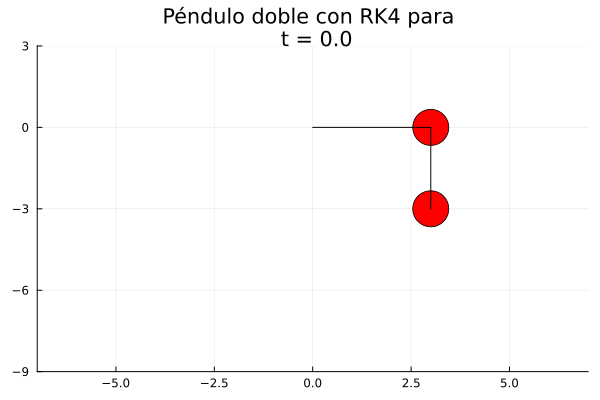

In [5]:
n=length(tiempos)

anim = @animate for i in 1:n
    
    ultimo = rect(i-20)+1
    
    scatter([-l*sin(xs[i,1])],[-l*cos(xs[i,1])],markersize=20,label=false,color="red")
    plot!([0,-l*sin(xs[i,1])],[0,-l*cos(xs[i,1])],label=false,color="black")
    
    scatter!([-l*sin(xs[i,1])-l*sin(xs[i,3])],[-l*cos(xs[i,1])-l*cos(xs[i,3])],markersize=20,label=false,color="red")
    plot!([-l*sin(xs[i,1]),-l*sin(xs[i,1])-l*sin(xs[i,3])],[-l*cos(xs[i,1]),-l*cos(xs[i,1])-l*cos(xs[i,3])],label=false,color="black")
    
    aux_x=[-l*sin(xs[t,1])-l*sin(xs[t,3]) for t in ultimo:i]
    aux_y=[-l*cos(xs[t,1])-l*cos(xs[t,3]) for t in ultimo:i]
    plot!(aux_x,aux_y,color="red",label=false)
    
    title!("Péndulo doble con RK4 para \n t = $(round(tiempos[i],digits=2))")
    xlims!(-7,7)
    ylims!(-9,3)
end
gif(anim,fps=20)

## Soluciones para ángulos pequeños

In [6]:
## Parámetros y condiciones iniciales
l= 10
t_0 = 0
t_f = 30
h = 0.1

th1=0.1
th2=0.1
x_0 = [th1,0,th2,0]

## Solución con rk4
tiempos, xs = penduloDobleRK4(l,x_0,t_0,t_f,h);

In [7]:
## Soluciones analíticas
α=sqrt(2-sqrt(2))
β=sqrt(2+sqrt(2))
ω=9.81/l

theta_1(t)=(1/4)*((2*th1+sqrt(2)*th2)*cos(α*ω*t)+(2*th1-sqrt(2)*th2)*cos(β*ω*t))
theta_2(t)=(1/2)*((sqrt(2)*th1+th2)*cos(α*ω*t)+(-sqrt(2)th1+th2)*cos(β*ω*t))
csi_1(t)=(-1/2)*ω*(β*(sqrt(2)*th1+th2)*sin(α*ω*t)+α*(sqrt(2)*th1-th2)*sin(β*ω*t))
csi_2(t)=(-1/4)*ω*(β*(2*th1+sqrt(2)*th2)*sin(α*ω*t)+α*(-2*th1+sqrt(2)*th2)*sin(β*ω*t));

In [8]:
## Gráficas
plot(tiempos, [theta_1(t) for t in tiempos],ylabel=L"\theta_{1}",label=false)
p1=plot!(tiempos,xs[:,1],label=false);
plot(tiempos, [theta_2(t) for t in tiempos],ylabel=L"\theta_{2}",label=false)
p2=plot!(tiempos,xs[:,3],label=false);
plot(tiempos, [csi_1(t) for t in tiempos],ylabel=L"\xi_{1}",label=false)
p3=plot!(tiempos,xs[:,2],label=false);
plot(tiempos, [csi_2(t) for t in tiempos],ylabel=L"\xi_{2}",label=false)
p4=plot!(tiempos,xs[:,4],label=false);

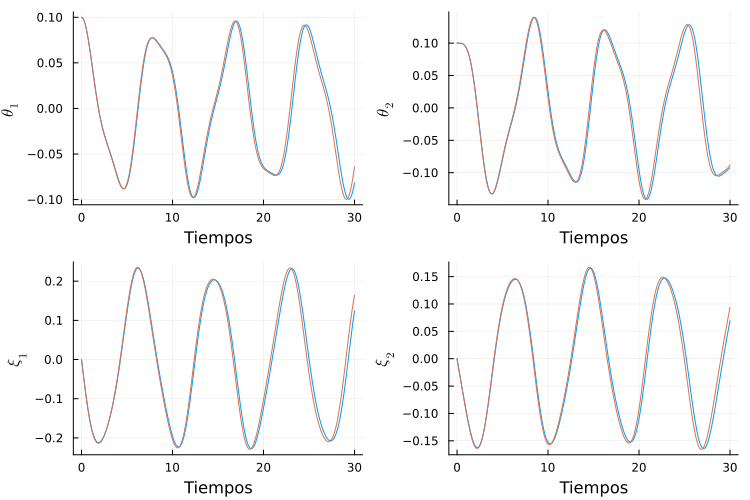

In [9]:
plot(p1,p2,p3,p4, layout = (2,2),xlabel="Tiempos",size=(750,500))

## Generación del fractal

In [11]:
### Sin simetrías

# Condiciones iniciales y parámetros del péndulo
l=5.
t_0 = 0
t_f = 30
h = 0.1

# Inicializaciones del método
n=100
rang=range(-pi, pi, n)
t_true=t_f*ones(n,n) ## Matriz donde se guardan los tiempos donde el péndulo da la vuelta
                     ## Si no gira, se gurda el tiempo final   
@time begin
for i in 1:1:n
    for j in 1:1:n
        # Obtiene las soluciones para una malla de nxn de án gulos theta1 y theta2
        x_0=[rang[i],0,rang[j],0]
        tiempos, xs = penduloDobleRK4(l,x_0,t_0,t_f,h)

        # Determina si el péndulo giró para algún tiempo y lo guarda en la matriz t_true
        for k in 1:length(tiempos)
            if (round(abs(xs[k,1]),digits=4)>round(pi,digits=4) || round(abs(xs[k,3]),digits=4)>round(pi,digits=4))
                t_true[i,j]=tiempos[k]
                break
            end
        end
    end
end
end

 16.910529 seconds (95.52 M allocations: 8.071 GiB, 14.27% gc time, 0.12% compilation time)


In [13]:
### Utilizando simetrías y la condición de no giro

# Condiciones iniciales y parámetros del péndulo
l=5.
t_0 = 0.
t_f = 30.
h = 0.1

# Inicializaciones del método
n=1250
rang=range(-pi, pi, n)
t_true=t_f*ones(round(Int,n/2,RoundDown),n)


@time begin
for i in 1:1:round(Int,n/2,RoundDown) #El método sólo se implementa para la sección superior por simetría
    for j in 1:1:n
       if (2*cos(rang[i])+cos(rang[j]))<1 ## El péndulo gira si se cumple esta condición
                
            # Obtiene las soluciones para una malla de nxn de ángulos theta1 y theta2
            x_0=[rang[i],0,rang[j],0]
            tiempos, xs = penduloDobleRK4(l,x_0,t_0,t_f,h)

            # Determina si el péndulo giró para algún tiempo y lo guarda en la matriz t_true
            for k in 1:length(tiempos)
                if ((round(abs(xs[k,1]),digits=4)>round(pi,digits=4) || round(abs(xs[k,3]),digits=4)>round(pi,digits=4)))
                    t_true[i,j]=tiempos[k]
                break
                end
            end
        end
    end
end
# Se refleja la matriz
t_true=vcat(t_true,reverse(reverse(t_true, dims=1), dims=2))
end;

889.632207 seconds (4.97 G allocations: 434.066 GiB, 13.56% gc time, 0.06% compilation time)
